In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/tips (data for regression problem).csv')

In [55]:
# Display basic info about the dataset
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time 

In [56]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Handling missing values (if any)
# For simplicity, fill missing numerical values with the median and categorical values with the mode
for col in data.columns:
    if data[col].dtype == 'object':  # Categorical data
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numerical data
        data[col].fillna(data[col].median(), inplace=True)


Summary Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


<ipython-input-56-bc76e10ed146>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-56-bc76e10ed146>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [57]:
# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


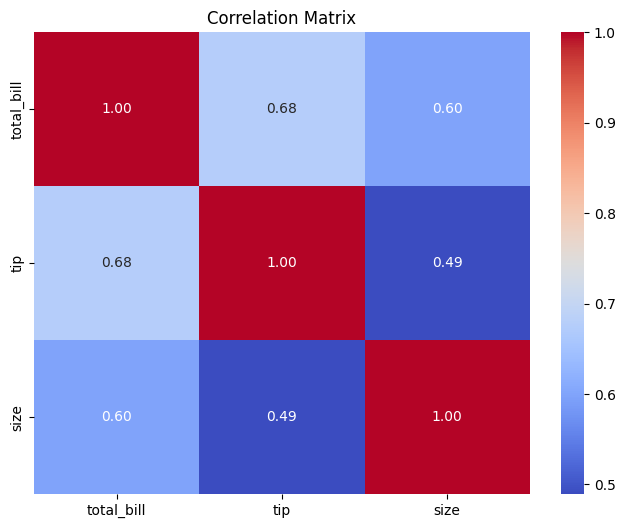

In [58]:
# Correlation analysis for numerical variables
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

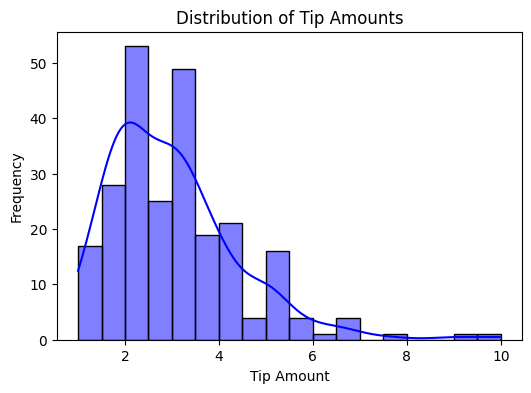

In [59]:
# Distribution of the tip amounts
plt.figure(figsize=(6, 4))
sns.histplot(data['tip'], kde=True, color='blue')
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

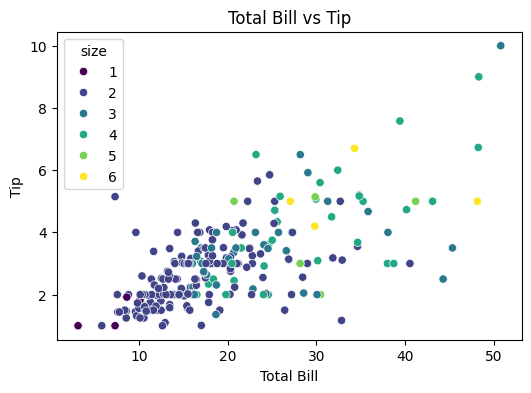

In [60]:
# Relationships between key variables
# Scatter plot: Total bill vs. Tip
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='size', palette='viridis')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

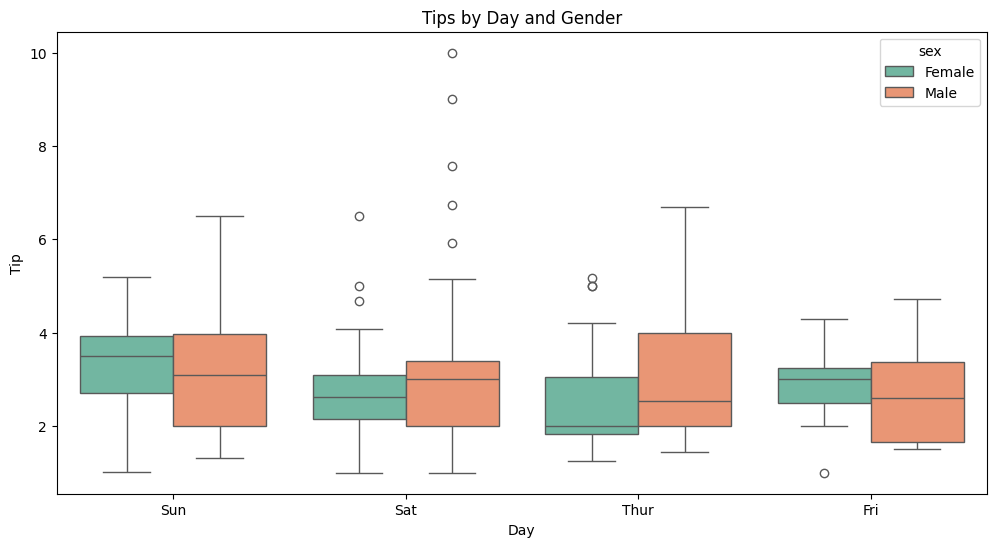

In [61]:
# Boxplots for categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='day', y='tip', hue='sex', palette='Set2')
plt.title('Tips by Day and Gender')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

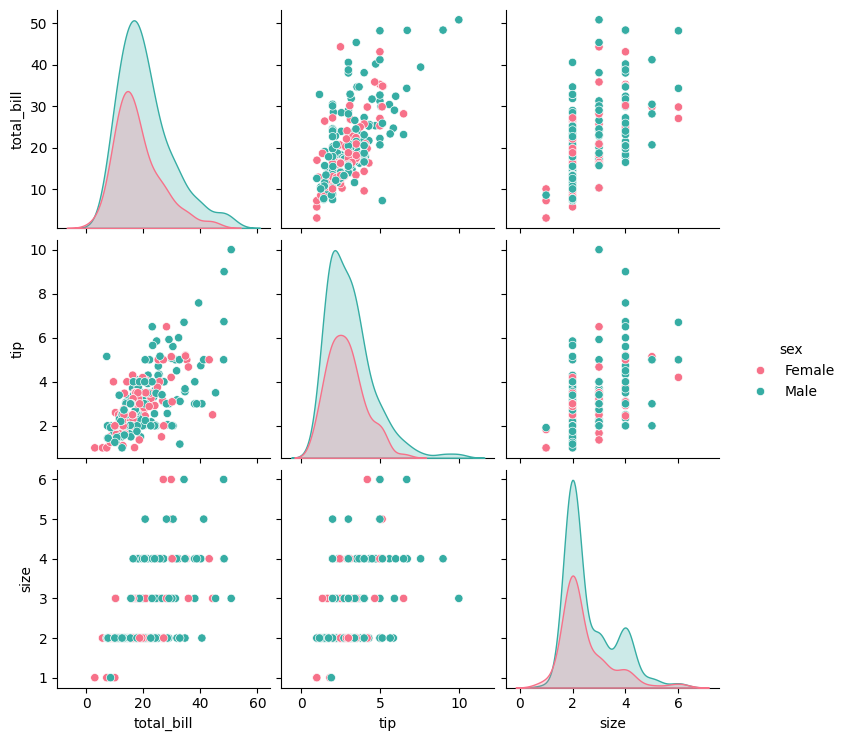

In [62]:
# Pair plot to explore relationships between variables
sns.pairplot(data, diag_kind='kde', hue='sex', palette='husl')
plt.show()

In [63]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

In [65]:
# Define features (X) and target (y)
X = data_encoded.drop('tip', axis=1)
y = data_encoded['tip']

In [66]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Dictionary to store model performance
model_performance = {}

In [68]:
# Function to evaluate a model
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    print(f"{name} Performance:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print("-" * 40)

In [69]:
# Train and evaluate models
print("Training and Evaluating Models...")
# 1. Linear Regression
linear_model = LinearRegression()
evaluate_model(linear_model, "Linear Regression")

Training and Evaluating Models...
Linear Regression Performance:
Mean Absolute Error: 0.6671
Mean Squared Error: 0.7034
R-squared: 0.4373
----------------------------------------


In [70]:
# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
evaluate_model(ridge_model, "Ridge Regression")


Ridge Regression Performance:
Mean Absolute Error: 0.6665
Mean Squared Error: 0.7007
R-squared: 0.4394
----------------------------------------


In [71]:
# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
evaluate_model(lasso_model, "Lasso Regression")

Lasso Regression Performance:
Mean Absolute Error: 0.6375
Mean Squared Error: 0.5909
R-squared: 0.5273
----------------------------------------


In [72]:
# 4. Decision Tree Regression
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
evaluate_model(tree_model, "Decision Tree Regression")

Decision Tree Regression Performance:
Mean Absolute Error: 0.6905
Mean Squared Error: 0.8490
R-squared: 0.3208
----------------------------------------


In [73]:
# 5. Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(forest_model, "Random Forest Regression")

Random Forest Regression Performance:
Mean Absolute Error: 0.7557
Mean Squared Error: 0.9197
R-squared: 0.2642
----------------------------------------


In [74]:
# 6. Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
evaluate_model(svr_model, "Support Vector Regression")

Support Vector Regression Performance:
Mean Absolute Error: 0.6756
Mean Squared Error: 0.9783
R-squared: 0.2174
----------------------------------------


In [75]:
# 7. K-Nearest Neighbors Regression (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, "K-Nearest Neighbors Regression")

K-Nearest Neighbors Regression Performance:
Mean Absolute Error: 0.7189
Mean Squared Error: 0.8764
R-squared: 0.2989
----------------------------------------


In [76]:
# Compare model performances
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                                     MAE       MSE        R2
Linear Regression               0.667133  0.703357  0.437302
Ridge Regression                0.666538  0.700748  0.439389
Lasso Regression                0.637484  0.590853  0.527307
Decision Tree Regression        0.690545  0.848990  0.320792
Random Forest Regression        0.755716  0.919672  0.264246
Support Vector Regression       0.675636  0.978250  0.217382
K-Nearest Neighbors Regression  0.718857  0.876373  0.298886


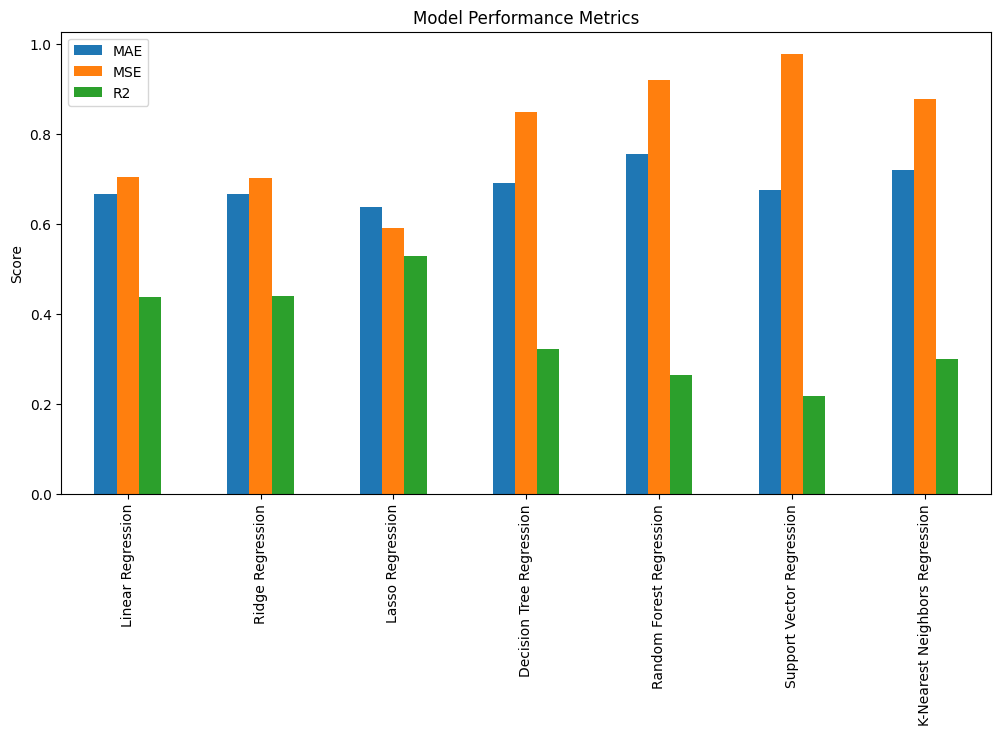

In [77]:
# Visualize model performances
performance_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

In [78]:
# Import required libraries
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

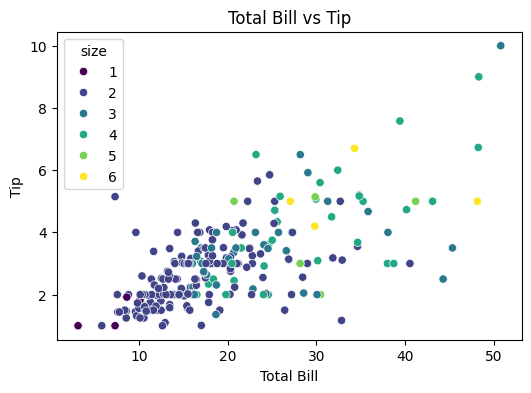

In [79]:
# 1. Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='size', palette='viridis')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

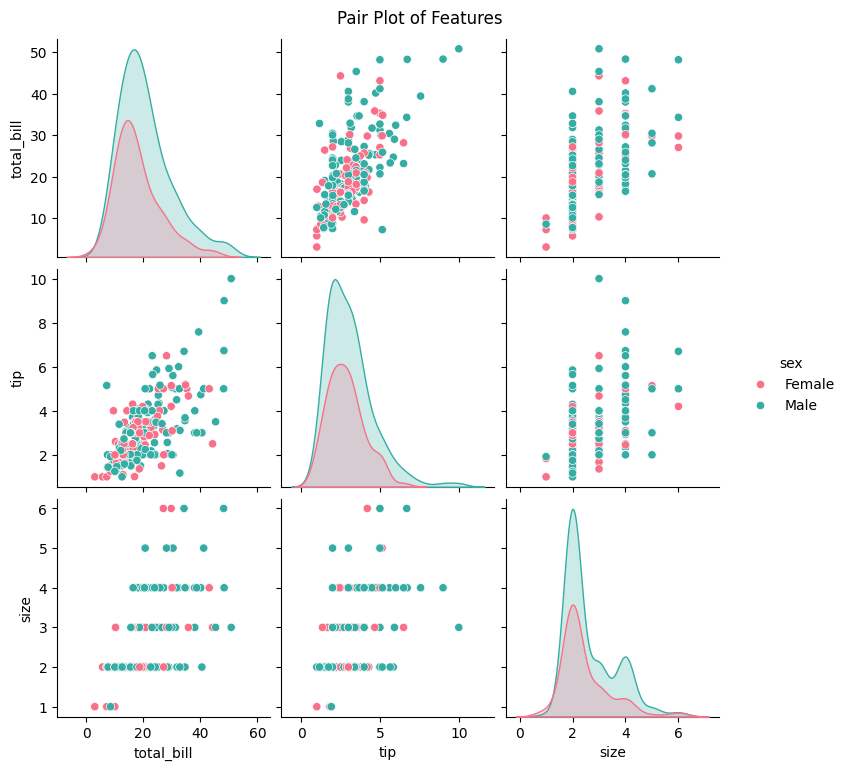

In [80]:
# 2. Pair Plot for Multiple Features
sns.pairplot(data, diag_kind='kde', hue='sex', palette='husl')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

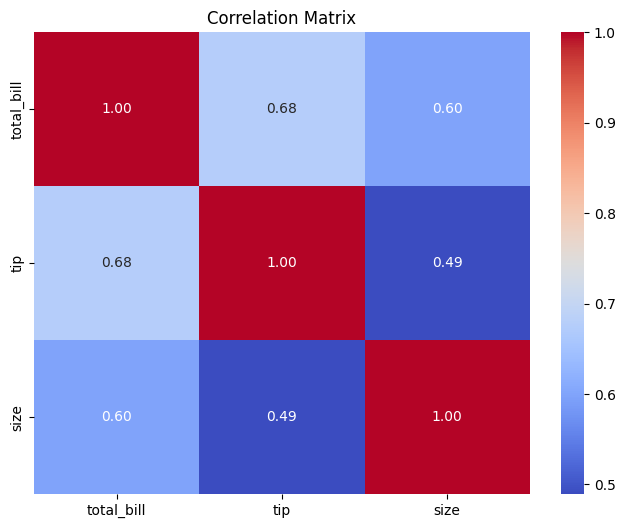

In [81]:
# 3. Correlation Matrix (Heatmap)
correlation_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

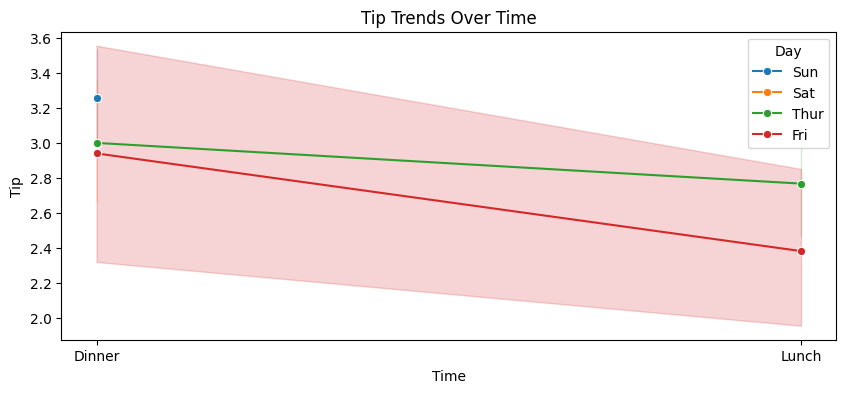

In [82]:
# 6. Line Plot (if time-series data exists)
# Assuming 'time' column exists for time-series data
if 'time' in data.columns:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=data, x='time', y='tip', hue='day', marker="o")
    plt.title('Tip Trends Over Time')
    plt.xlabel('Time')
    plt.ylabel('Tip')
    plt.legend(title='Day')
    plt.show()